## Run INSPIRE on multiple mouse embryo slices for 3D reconstruction

In this tutorial, we show INSPIRE’s ability to build 3D model of mouse embryo by integrating multiple 2D slices.

The mouse embryo data are publicly available at https://db.cngb.org/stomics/mosta/download/.

### Import packages

In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import anndata as ad
import umap
import os
import scipy.sparse
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import matplotlib as mpl
from matplotlib.lines import Line2D

import INSPIRE

import warnings
warnings.filterwarnings("ignore")

### Data preprocessing

Each ST slice contained a large number of spatial spots. For efficiency, we preprocessed each slice respectively.

In [ ]:
# slice_name = "E16.5_E2S8"

# # Load data
# print("load data", slice_name)
# data_dir = "data/Stereoseq_mouse_embryo"
# adata = sc.read_h5ad(os.path.join(data_dir, slice_name+".MOSTA.h5ad"))
# adata.X = adata.layers['count']
# adata.var_names_make_unique()
# adata.obs_names_make_unique()

# # Preprocess data
# INSPIRE.utils.calculate_node_features_LGCN(adata=adata,
#                                            slice_name=slice_name,
#                                            preprocessed_data_path="data/Stereoseq_mouse_embryo/preprocessed_data_3d",
#                                            min_genes_qc=50,
#                                            min_cells_qc=50,
#                                            rad_cutoff=1.6
#                                           )

The data after preprocessing are saved into preprocessed_data_path.

### Load preprocessed data

Finding highly variable genes...
Load data E16.5_E2S8
Load data E16.5_E2S9
Load data E16.5_E2S10
Load data E16.5_E2S11
Load data E16.5_E2S12
Find 2966 shared highly variable genes among datasets.
Store counts and library sizes for Poisson modeling...
Normalize data...
Load data E16.5_E2S8
Load data E16.5_E2S9
Load data E16.5_E2S10
Load data E16.5_E2S11
Load data E16.5_E2S12
Load and prepare node features for LGCN...
Load node features E16.5_E2S8
Node features for slice 0 : (120676, 5932)
Load node features E16.5_E2S9
Node features for slice 1 : (129376, 5932)
Load node features E16.5_E2S10
Node features for slice 2 : (113759, 5932)
Load node features E16.5_E2S11
Node features for slice 3 : (109281, 5932)
Load node features E16.5_E2S12
Node features for slice 4 : (94289, 5932)
Prepare an adata containing full spot locations and slice labels for better visualization...


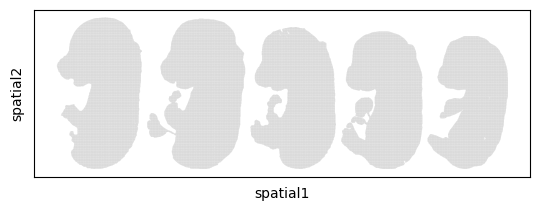

In [2]:
slice_name_list = ["E16.5_E2S8", "E16.5_E2S9", "E16.5_E2S10", "E16.5_E2S11", "E16.5_E2S12"]
preprocessed_data_path = "data/Stereoseq_mouse_embryo/preprocessed_data_3d"

adata_st_list, adata_full = INSPIRE.utils.prepare_inputs_LGCN(slice_name_list=slice_name_list,
                                                              preprocessed_data_path=preprocessed_data_path,
                                                              num_hvgs=8000,
                                                              spot_size=1.,
                                                              min_concat_dist=20)

### Run INSPIRE model

In [3]:
model = INSPIRE.model.Model_LGCN(adata_st_list=adata_st_list,
                                 n_spatial_factors=60,
                                 n_training_steps=10000,
                                 batch_size=2048
                                )

In [4]:
model.train(adata_st_list)

  0%|          | 1/10000 [00:02<6:50:37,  2.46s/it]

Step: 0, d_loss: 5.5533, Loss: 8648.1816, recon_loss: 7564.4771, fe_loss: 134.7938, geom_loss: 219.0089, beta_loss: 941.7137, gan_loss: 2.8164


  5%|▌         | 501/10000 [03:54<1:13:30,  2.15it/s]

Step: 500, d_loss: 4.0936, Loss: 6799.6064, recon_loss: 5718.1675, fe_loss: 92.3857, geom_loss: 488.3807, beta_loss: 973.8798, gan_loss: 5.4058


 10%|█         | 1001/10000 [07:45<1:10:00,  2.14it/s]

Step: 1000, d_loss: 3.8157, Loss: 5239.8032, recon_loss: 4104.0610, fe_loss: 91.3244, geom_loss: 454.3840, beta_loss: 1029.2563, gan_loss: 6.0736


 15%|█▌        | 1501/10000 [11:34<1:05:46,  2.15it/s]

Step: 1500, d_loss: 3.7621, Loss: 3883.4690, recon_loss: 2714.4673, fe_loss: 91.1893, geom_loss: 440.1596, beta_loss: 1062.4374, gan_loss: 6.5719


 20%|██        | 2001/10000 [15:25<1:02:37,  2.13it/s]

Step: 2000, d_loss: 3.7257, Loss: 2716.6931, recon_loss: 1540.6566, fe_loss: 90.9981, geom_loss: 465.1812, beta_loss: 1068.5623, gan_loss: 7.1727


 25%|██▌       | 2501/10000 [19:16<58:26,  2.14it/s]  

Step: 2500, d_loss: 3.9234, Loss: 1728.3782, recon_loss: 549.3525, fe_loss: 90.7758, geom_loss: 473.1777, beta_loss: 1072.6163, gan_loss: 6.1700


 30%|███       | 3001/10000 [23:06<54:41,  2.13it/s]

Step: 3000, d_loss: 3.8576, Loss: 994.8348, recon_loss: -167.3379, fe_loss: 90.5017, geom_loss: 441.4391, beta_loss: 1057.0203, gan_loss: 5.8220


 35%|███▌      | 3501/10000 [26:57<50:14,  2.16it/s]

Step: 3500, d_loss: 3.7828, Loss: 194.2820, recon_loss: -954.0574, fe_loss: 90.2834, geom_loss: 395.6738, beta_loss: 1044.0774, gan_loss: 6.0652


 40%|████      | 4001/10000 [30:48<46:48,  2.14it/s]

Step: 4000, d_loss: 3.7493, Loss: -222.3103, recon_loss: -1349.1482, fe_loss: 90.0547, geom_loss: 369.0643, beta_loss: 1023.7653, gan_loss: 5.6368


 45%|████▌     | 4501/10000 [34:39<42:36,  2.15it/s]

Step: 4500, d_loss: 3.7471, Loss: -341.5936, recon_loss: -1439.6331, fe_loss: 89.9799, geom_loss: 369.0586, beta_loss: 994.2235, gan_loss: 6.4548


 50%|█████     | 5001/10000 [38:30<38:49,  2.15it/s]

Step: 5000, d_loss: 3.7183, Loss: -584.0801, recon_loss: -1671.0793, fe_loss: 90.0652, geom_loss: 369.7906, beta_loss: 983.2839, gan_loss: 6.2543


 55%|█████▌    | 5501/10000 [42:21<35:02,  2.14it/s]

Step: 5500, d_loss: 3.8017, Loss: -694.8525, recon_loss: -1769.2306, fe_loss: 89.7439, geom_loss: 356.2195, beta_loss: 971.4628, gan_loss: 6.0470


 60%|██████    | 6001/10000 [46:12<30:55,  2.15it/s]

Step: 6000, d_loss: 3.7726, Loss: -911.4283, recon_loss: -1978.8911, fe_loss: 89.8415, geom_loss: 361.3640, beta_loss: 964.2572, gan_loss: 6.1368


 65%|██████▌   | 6501/10000 [50:04<27:16,  2.14it/s]

Step: 6500, d_loss: 3.7303, Loss: -780.4904, recon_loss: -1840.0757, fe_loss: 89.6845, geom_loss: 346.5454, beta_loss: 956.7856, gan_loss: 6.1842


 70%|███████   | 7001/10000 [53:55<23:19,  2.14it/s]

Step: 7000, d_loss: 3.7897, Loss: -712.4079, recon_loss: -1766.1638, fe_loss: 89.7189, geom_loss: 322.4746, beta_loss: 951.6609, gan_loss: 5.9267


 75%|███████▌  | 7501/10000 [57:46<19:19,  2.15it/s]

Step: 7500, d_loss: 3.7563, Loss: -879.4528, recon_loss: -1929.5426, fe_loss: 89.5975, geom_loss: 297.5077, beta_loss: 948.4641, gan_loss: 6.0780


 80%|████████  | 8001/10000 [1:01:36<15:30,  2.15it/s]

Step: 8000, d_loss: 3.6589, Loss: -1095.2783, recon_loss: -2142.0918, fe_loss: 89.2430, geom_loss: 286.2124, beta_loss: 945.6093, gan_loss: 6.2370


 85%|████████▌ | 8501/10000 [1:05:27<11:40,  2.14it/s]

Step: 8500, d_loss: 3.5608, Loss: -703.2833, recon_loss: -1747.6008, fe_loss: 89.3475, geom_loss: 278.3501, beta_loss: 942.7364, gan_loss: 6.6666


 90%|█████████ | 9001/10000 [1:09:19<07:45,  2.15it/s]

Step: 9000, d_loss: 3.5137, Loss: -823.5667, recon_loss: -1866.2191, fe_loss: 89.4667, geom_loss: 268.2156, beta_loss: 941.1996, gan_loss: 6.6219


 95%|█████████▌| 9501/10000 [1:13:10<03:51,  2.16it/s]

Step: 9500, d_loss: 3.6148, Loss: -1027.9996, recon_loss: -2068.3501, fe_loss: 89.2274, geom_loss: 255.3610, beta_loss: 939.6401, gan_loss: 6.3757


100%|██████████| 10000/10000 [1:17:00<00:00,  2.16it/s]


### Access spot representations, proportions of spatial factors in spots, and gene loading matrix

We evaluate the spot representations and proportions of spatial factors in spots with minibatches.

In [5]:
adata_full, basis_df = model.eval_minibatch(adata_st_list, 
                                            adata_full, 
                                            batch_size=10000
                                           )

Evaluate Z and beta using minibatch...
Evaluation for slice 0
Evaluation for slice 1
Evaluation for slice 2
Evaluation for slice 3
Evaluation for slice 4


In [6]:
reducer = umap.UMAP(n_neighbors=30,
                    n_components=2,
                    metric="correlation",
                    n_epochs=None,
                    learning_rate=1.0,
                    min_dist=0.3,
                    spread=1.0,
                    set_op_mix_ratio=1.0,
                    local_connectivity=1,
                    repulsion_strength=1,
                    negative_sample_rate=5,
                    a=None,
                    b=None,
                    random_state=1234,
                    metric_kwds=None,
                    angular_rp_forest=False,
                    verbose=True)
embedding = reducer.fit_transform(adata_full.obsm['latent'])
adata_full.obsm["X_umap"] = embedding
adata_full.obs["slice_label"] = adata_full.obs["slice_label"].values.astype(str)

UMAP(angular_rp_forest=True, local_connectivity=1, metric='correlation', min_dist=0.3, n_neighbors=30, random_state=1234, repulsion_strength=1, verbose=True)
Sat Aug 24 14:15:28 2024 Construct fuzzy simplicial set
Sat Aug 24 14:15:28 2024 Finding Nearest Neighbors
Sat Aug 24 14:15:28 2024 Building RP forest with 43 trees
Sat Aug 24 14:15:34 2024 NN descent for 19 iterations
	 1  /  19
	 2  /  19
	 3  /  19
	Stopping threshold met -- exiting after 3 iterations
Sat Aug 24 14:16:18 2024 Finished Nearest Neighbor Search
Sat Aug 24 14:16:26 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Sat Aug 24 14:30:33 2024 Finished embedding


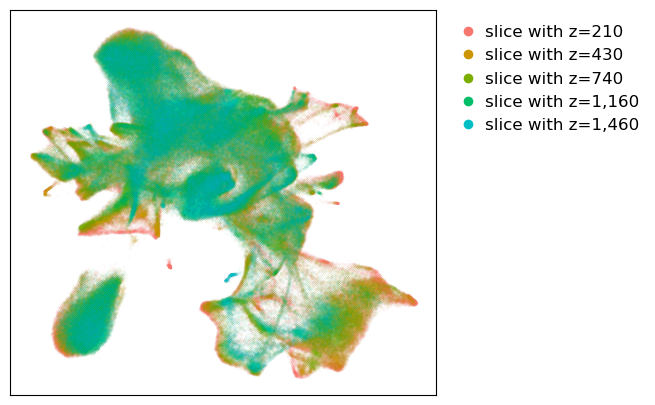

In [7]:
adata = adata_full

size = 0.001
slice_names = ["slice with z=210", "slice with z=430", "slice with z=740", "slice with z=1,160", "slice with z=1,460"]

f = plt.figure(figsize=(5.5,5))
ax = f.add_subplot(1,1,1)
colors = ["#F8766D", "#CD9600", "#7CAE00", "#00BE67", "#00BFC4", "#00A9FF", "#C77CFF", "#FF61CC"]
for i in range(len(set(adata.obs["slice_label"]))):
    ax.scatter(embedding[adata.obs["slice_label"].values.astype(str)==str(i), 0], 
               embedding[adata.obs["slice_label"].values.astype(str)==str(i), 1], 
               s=size, c=colors[i], label=slice_names[i], rasterized=True)
legend_elements_slice = [Line2D([0], [0], marker='o', color="w", label=slice_names[i], markerfacecolor=colors[i], markersize=4) for i in range(len(slice_names))]
ax.legend(handles=legend_elements_slice, loc="upper left", bbox_to_anchor=(1, 1.), 
          frameon=False, markerscale=2, fontsize=12, handletextpad=0., 
          ncol=1)
ax.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)
plt.show()

In [13]:
# clustering

sc.pp.neighbors(adata_full, use_rep="latent", n_neighbors=15)
sc.tl.louvain(adata_full, resolution=.8)

In [14]:
rgb_10 = [i for i in get_cmap('Set3').colors]
rgb_20 = [i for i in get_cmap('tab20').colors]
rgb_20b = [i for i in get_cmap('tab20b').colors]
rgb_dark2 = [i for i in get_cmap('Dark2').colors]
rgb_pst1 = [i for i in get_cmap('Pastel1').colors]
rgb_acc = [i for i in get_cmap('Accent').colors]
rgb2hex_10 = [mpl.colors.rgb2hex(color) for color in rgb_10]
rgb2hex_20 = [mpl.colors.rgb2hex(color) for color in rgb_20]
rgb2hex_20b = [mpl.colors.rgb2hex(color) for color in rgb_20b]
rgb2hex_20b_new = [rgb2hex_20b[i] for i in [0, 3, 4, 7, 8, 11, 12, 15, 16, 19]]
rgb2hex_dark2 = [mpl.colors.rgb2hex(color) for color in rgb_dark2]
rgb2hex_pst1 = [mpl.colors.rgb2hex(color) for color in rgb_pst1]
rgb2hex_acc = [mpl.colors.rgb2hex(color) for color in rgb_acc]
rgb2hex = rgb2hex_20 + rgb2hex_20b_new + rgb2hex_dark2 + rgb2hex_pst1 + rgb2hex_acc

adata_full.obs["anno"] = adata_full.obs["louvain"].values.astype(str)
adata_full.obs["anno"][adata_full.obs["louvain"].values.astype(str) == "15"] = "13"
adata_full.obs["anno"][adata_full.obs["louvain"].values.astype(str) == "13"] = "15"

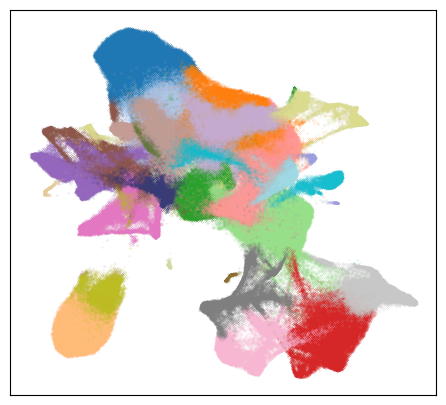

In [15]:
size = 0.01
umap = adata.obsm["X_umap"]
n_cells = umap.shape[0]
np.random.seed(1234)
order = np.arange(n_cells)
np.random.shuffle(order)

f = plt.figure(figsize=(5.5, 5))

ax2 = f.add_subplot(1,1,1)
n_louvain = len(set(adata.obs["anno"]))
colors = rgb2hex
for i in range(n_louvain):
    ax2.scatter(embedding[adata.obs["anno"].values.astype(str)==str(i), 0], 
                embedding[adata.obs["anno"].values.astype(str)==str(i), 1], 
                s=size, c=colors[i], label="cluster "+str(i), rasterized=True)
ax2.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)
f.subplots_adjust(hspace=0.02, wspace=0.1)
plt.show()

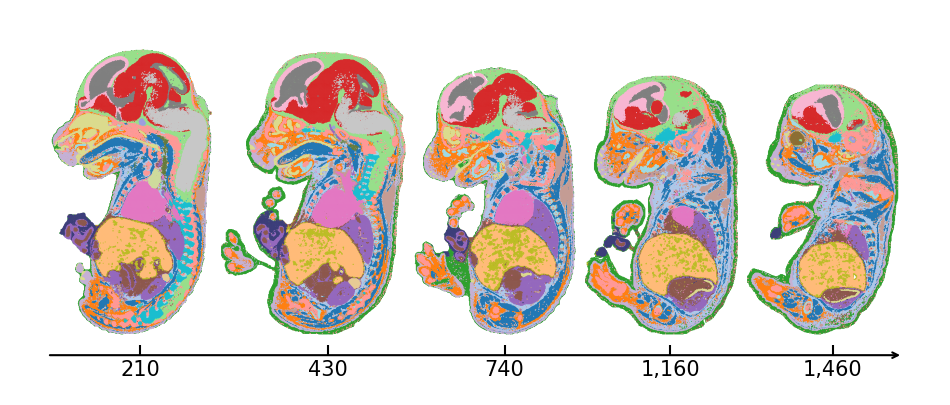

In [16]:
loc_list = []
n_slices = len(set(adata_full.obs["slice_label"]))

for i in range(n_slices):
    # Load data
    ad_tmp = adata[adata.obs["slice_label"].values.astype(str) == str(i), :]
    loc_list.append(ad_tmp.obsm["spatial"])

size = 0.5

# louvain
f = plt.figure(figsize=(12,5))
ax = f.add_subplot(1,1,1)
ax.axis('equal')
colors = rgb2hex
for i in range(n_louvain):
    ax.scatter(adata.obsm["spatial"][adata.obs["anno"].values.astype(str)==str(i), 0], 
               -adata.obsm["spatial"][adata.obs["anno"].values.astype(str)==str(i), 1], 
               s=size, facecolors=colors[i], edgecolors='none', label="cluster "+str(i), rasterized=True)

y_arrow = -600
e_val_list = ["210","430","740","1,160","1,460"]

ax.annotate("", xy=(max(loc_list[-1][:,0])+10, y_arrow), xytext=(min(loc_list[0][:,0])-10, y_arrow), arrowprops=dict(arrowstyle="->", lw=1.5))
for i in range(len(loc_list)):
    x_m = np.median(loc_list[i][:, 0])
    plt.vlines(x = x_m, ymin=y_arrow, ymax=y_arrow+20, color = 'k')
    e_val = e_val_list[i]
    plt.annotate(e_val, xy=(x_m, y_arrow-40), ha='center', fontsize=15)

ax.set_axis_off()
plt.show()

### Save results

In [17]:
res_path = "Results/INSPIRE_3d_reconstruction"
adata_full.write(res_path + "/adata_inspire.h5ad")
basis_df.to_csv(res_path + "/basis_df_inspire.csv")